In [1]:
import lightgbm as lgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

sns.set_style('darkgrid')

In [2]:
%load_ext autoreload
%autoreload 2

# Generate sythetic datasets

In [11]:
# import synthetic data generator
from SyntheticData import SyntheticData
data_generator = SyntheticData()

In [10]:
def max_plot(results, title):
    """
    Print optimal average revenue based on model. 
    Return box plots of purchases (0: no purchase or 1: purchase) over price,
    scatter plot of the first two covariates and price, and a histogram
    of the optimal price over the distribution of individuals.
    """
    fig, ax = plt.subplots(1, 3, figsize=(10, 2.5))

    sns.boxplot(data=results, x='Y', y='price', ax = ax[0])
    sns.scatterplot(data=results, x='X0', y='X1', hue='price', ax=ax[1])
    sns.histplot(data=results, x='optimal_price', ax=ax[2])
    plt.suptitle(title)

    ax[2].set_ylabel("Sample Count")
    ax[2].set_xlabel("Optimal Price")
    
    print('Optimal Average Revenue:', results.optimal_price.sum()/len(results))

Optimal Average Revenue: 4.983652879639156


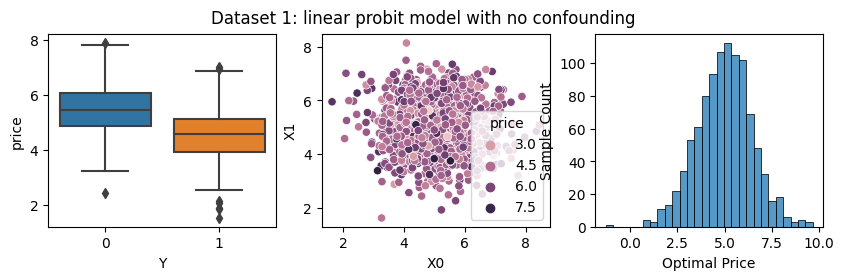

In [22]:
# plot dataset 1
results = data_generator.generate_data(model_id=1, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

Optimal Average Revenue: -8.675416315872278


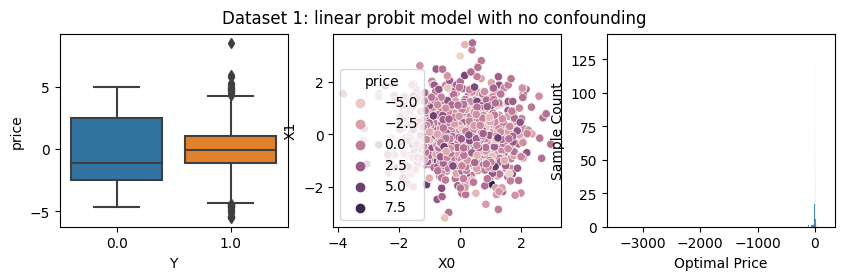

In [16]:
# plot dataset 2
results = data_generator.generate_data(model_id=2, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

Optimal Average Revenue: 5.111968730632863


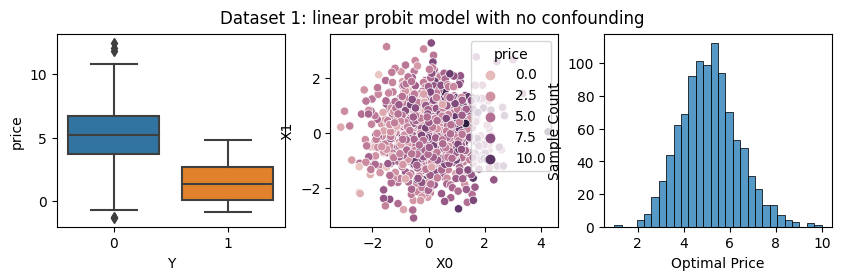

In [23]:
results = data_generator.generate_data(model_id=3, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

Optimal Average Revenue: 5.200134271074336


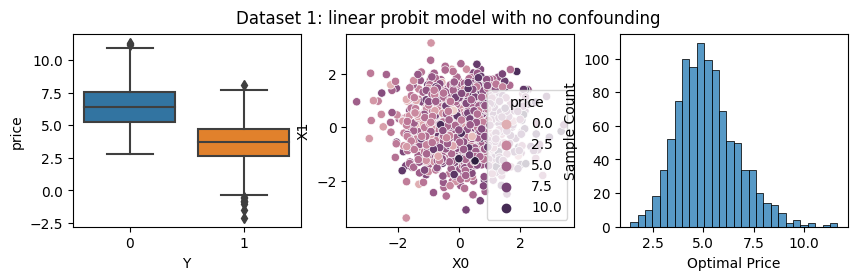

In [24]:
# plot dataset 4
results = data_generator.generate_data(model_id=4, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

Optimal Average Revenue: 5.006136684983538


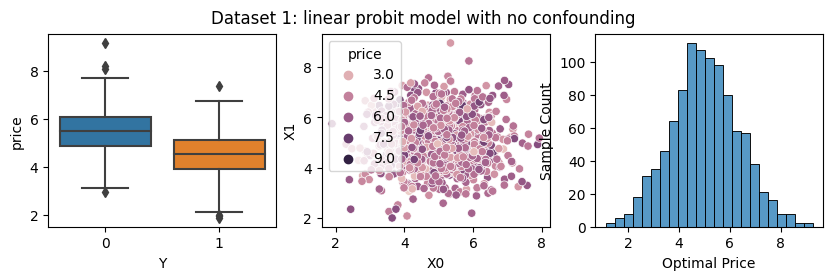

In [25]:
# plot dataset 5
results = data_generator.generate_data(model_id=1, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

Optimal Average Revenue: 1.2716814939555647


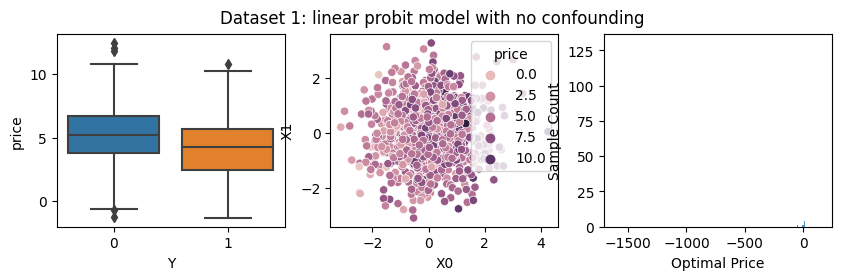

In [26]:
# plot dataset 6
results = data_generator.generate_data(model_id=6, n_samples=1000)
max_plot(results, "Dataset 1: linear probit model with no confounding")

# Evaluate SPT on synthetic data

In [23]:
from VaryingDepthSPT import VaryingDepthSPT
experiment = VaryingDepthSPT()

# run varying depth experiment
model_ids = [4]# , 2, 3, 4, 5, 6]
results = {}

n_samples = 5000
n_iter = 10

for model_id in model_ids:
    # get experimental results student prescription tree and
    # optimal prescription tree (based on underlying model)
    spt_results, opt_results = experiment.get_varying_depth_rev(
        model_id=model_id, n_samples=n_samples, n_iter=n_iter)

    # create model object
    results[model_id] = {}
    x = results[model_id]

    # create varying depth object
    x['varyingDepth'] = {}
    x = x['varyingDepth']

    # store results
    x['spt'] = spt_results
    x['opt'] = opt_results

100%|██████████| 10/10 [01:21<00:00,  8.19s/it]


In [24]:
# write experimental results to file system
with open('results/spt_experiments.json', 'w') as f:
    json.dump(results, f)

## Plot results

In [19]:
# format plot
from matplotlib.lines import Line2D

def plot_results(model_id, ax):
    # plot SPT results
    sns.pointplot(
        data=np.array(results[model_id]['varyingDepth']['spt']), 
        errorbar=('ci', 90), 
        color='orange',
        linestyles='-',
        capsize=.1,
        scale=0.5,
        errwidth=0.5,
        ax=ax[0]
    )

    # plot optimal results
    sns.pointplot(
        data=np.array(results[model_id]['varyingDepth']['opt']), 
        errorbar=('ci', 90), 
        color='blue',
        linestyles='--',
        capsize=.1,
        scale=0.5,
        errwidth=0.5,
        ax=ax[0]
    )

    # # plot SPT results
    # sns.pointplot(
    #     data=np.array(spt_results2).transpose(), 
    #     errorbar=('ci', 90), 
    #     color='orange',
    #     linestyles='-',
    #     capsize=.1,
    #     scale=0.5,
    #     errwidth=0.5,
    #     ax=ax[1]
    # )

    # # plot optimal results
    # sns.pointplot(
    #     data=np.array(opt_results2).transpose(), 
    #     errorbar=('ci', 90), 
    #     color='blue',
    #     linestyles='--',
    #     capsize=.1,
    #     scale=0.5,
    #     errwidth=0.5,
    #     ax=ax[1]
    # )

    print(np.array(spt_results).mean(axis=0))
    print(np.array(opt_results).mean(axis=0))

    a = Line2D([], [], color='orange', label='SPT')
    b = Line2D([], [], color='blue', label='Optimal', linestyle='--')
    plt.legend(handles=[a, b])

    # ax[0].set_ylim(3.1, 3.6)
    ax[0].set_xticks(ticks=range(5), labels=[1, 2, 3, 4, 5])
    ax[0].set_xlabel("Depth")
    ax[0].set_ylabel("Avg. Revenue")
    ax[0].grid(True) 

    ax[1].grid(True)
    ax[1].set_xticks(ticks=range(5), labels=[100, 300, 1000, 3000, 10000])
    ax[1].set_xlabel('Training Data Size')
    ax[1].set_ylabel('Avg. Revenue')

    plt.show()

[3.27713793 3.35694121 3.36619783 3.36991373 3.36991373]
[3.31249436 3.42359524 3.47926346 3.50347682 3.50347682]


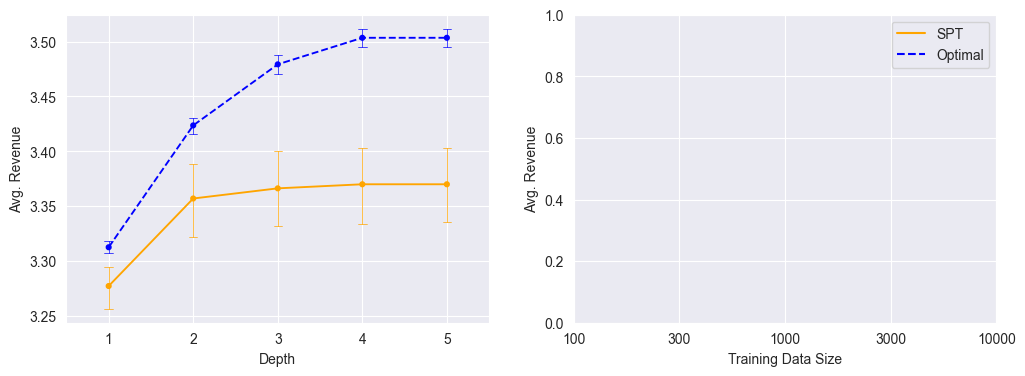

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

with open('results/spt_experiments.json', 'r') as f:
    results = json.load(f)
    
model_id = str(4)
plot_results(model_id, ax)